In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("bike_sharing_demand.csv")

In [5]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


**데이터 설명**
- You are provided hourly rental data spanning two years. For this competition, the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. **You must predict the total count of bikes rented** during each hour covered by the test set, using only information available prior to the rental period. > count를 예측한다.

### 데이터 확인

In [6]:
## 데이터는 10886행, 14개의 열을 갖는다.
print("데이터 형태 : ", df.shape)

데이터 형태 :  (10886, 12)


In [7]:
# 데이터의 형식을 확인한다. >> datetime의 경우 날짜형 데이터므로 날짜형식의 데이터로 바꿔준다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
# 데이터 결측치 확인 >> 결측치가 존재하지 않는다.
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [9]:
df["datetime"] = pd.to_datetime(df['datetime'])

In [10]:
# datetime이 날짜형으로 바뀌었다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


### EDA

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# 년도와 월을 각각 추출해본다.
df["year"] = df['datetime'].dt.year
df["month"] = df["datetime"].dt.month

In [13]:
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1


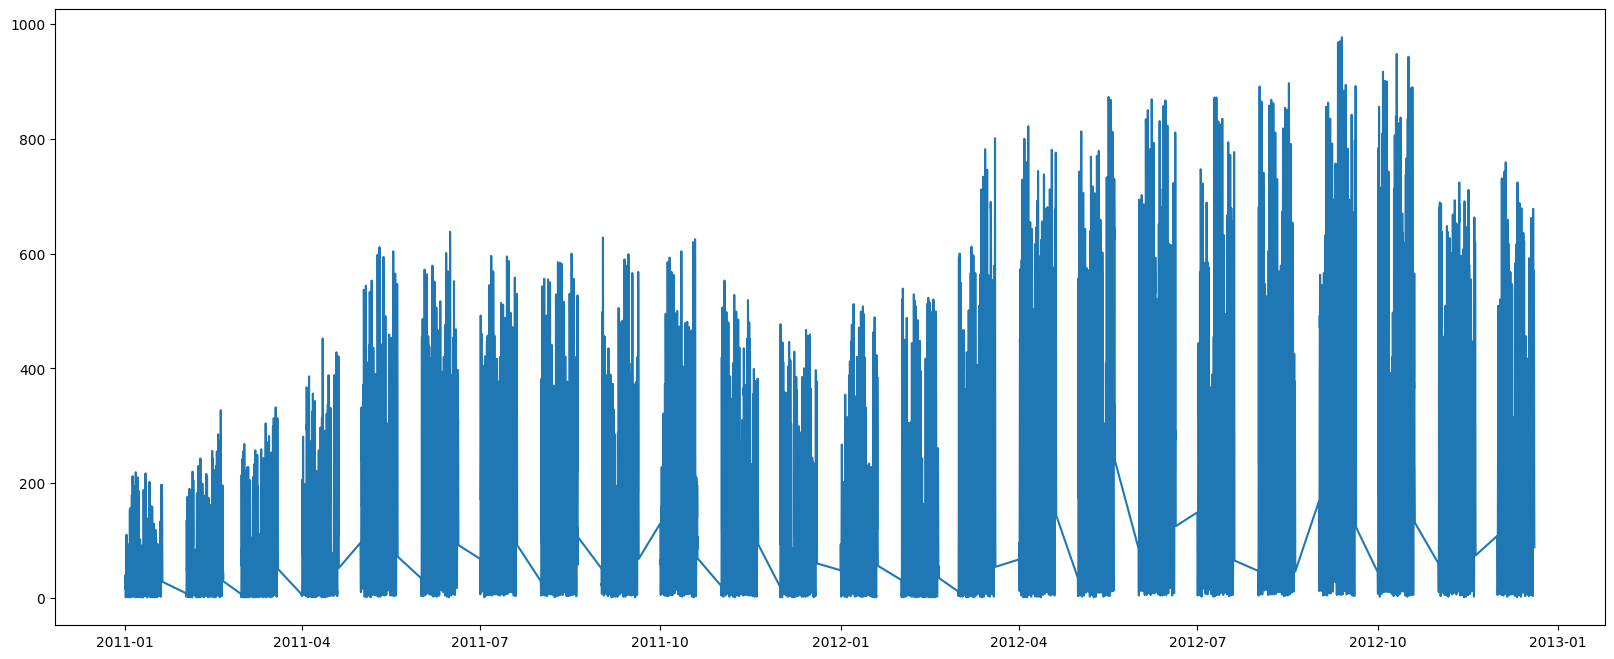

In [14]:
plt.figure(figsize = (20,8))
plt.plot(df["datetime"].values, df["count"].values)

(array([1.86e+03, 8.07e+02, 5.60e+02, 5.71e+02, 4.86e+02, 5.02e+02,
        4.86e+02, 4.78e+02, 4.32e+02, 4.39e+02, 3.91e+02, 3.98e+02,
        2.82e+02, 3.28e+02, 2.87e+02, 2.50e+02, 2.26e+02, 1.96e+02,
        2.03e+02, 1.92e+02, 1.49e+02, 1.42e+02, 1.12e+02, 1.29e+02,
        1.01e+02, 1.21e+02, 8.60e+01, 6.50e+01, 8.30e+01, 7.10e+01,
        5.40e+01, 4.10e+01, 5.10e+01, 3.80e+01, 4.90e+01, 2.70e+01,
        2.90e+01, 2.30e+01, 2.10e+01, 1.60e+01, 1.90e+01, 1.80e+01,
        2.00e+01, 1.60e+01, 1.20e+01, 1.00e+01, 3.00e+00, 1.00e+00,
        2.00e+00, 3.00e+00]),
 array([  1.  ,  20.52,  40.04,  59.56,  79.08,  98.6 , 118.12, 137.64,
        157.16, 176.68, 196.2 , 215.72, 235.24, 254.76, 274.28, 293.8 ,
        313.32, 332.84, 352.36, 371.88, 391.4 , 410.92, 430.44, 449.96,
        469.48, 489.  , 508.52, 528.04, 547.56, 567.08, 586.6 , 606.12,
        625.64, 645.16, 664.68, 684.2 , 703.72, 723.24, 742.76, 762.28,
        781.8 , 801.32, 820.84, 840.36, 859.88, 879.4 , 898.92, 91

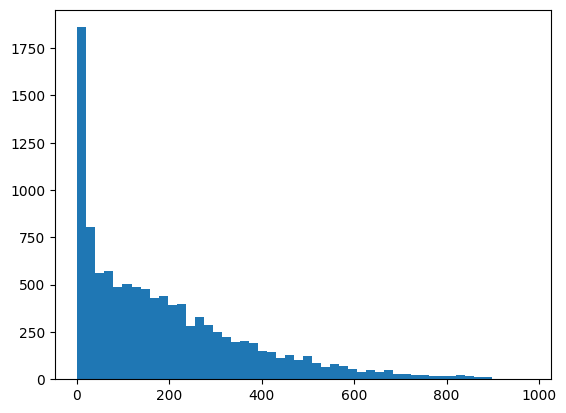

In [15]:
# 종속 변수가 왼쪽으로 매우 치우쳐져 있음을 알 수 있다. >> 정규분포를 따르기 위해 로그값을 취해준다.
plt.hist(df["count"], bins = 50)

(array([105.,   0.,   0.,   0.,   0., 132.,   0., 144.,   0.,   0., 149.,
        169.,   0., 135., 118., 182.,  95.,  95., 141., 123., 173.,  99.,
        143., 173., 174., 155., 197., 183., 209., 217., 256., 264., 349.,
        322., 422., 470., 474., 565., 562., 586., 562., 534., 517., 450.,
        374., 323., 242., 162., 102.,  39.]),
 array([0.        , 0.13768973, 0.27537947, 0.4130692 , 0.55075893,
        0.68844867, 0.8261384 , 0.96382813, 1.10151786, 1.2392076 ,
        1.37689733, 1.51458706, 1.6522768 , 1.78996653, 1.92765626,
        2.065346  , 2.20303573, 2.34072546, 2.47841519, 2.61610493,
        2.75379466, 2.89148439, 3.02917413, 3.16686386, 3.30455359,
        3.44224333, 3.57993306, 3.71762279, 3.85531253, 3.99300226,
        4.13069199, 4.26838172, 4.40607146, 4.54376119, 4.68145092,
        4.81914066, 4.95683039, 5.09452012, 5.23220986, 5.36989959,
        5.50758932, 5.64527905, 5.78296879, 5.92065852, 6.05834825,
        6.19603799, 6.33372772, 6.47141745, 6.

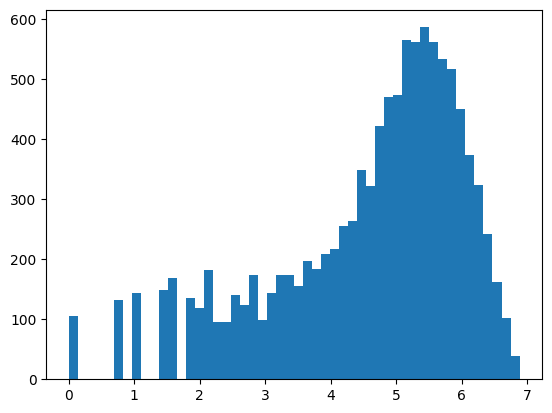

In [16]:
# 로그 변환을 하니 치우친게 좀 덜해졌다.
plt.hist(np.log(df["count"]), bins = 50)

<Axes: xlabel='year', ylabel='count'>

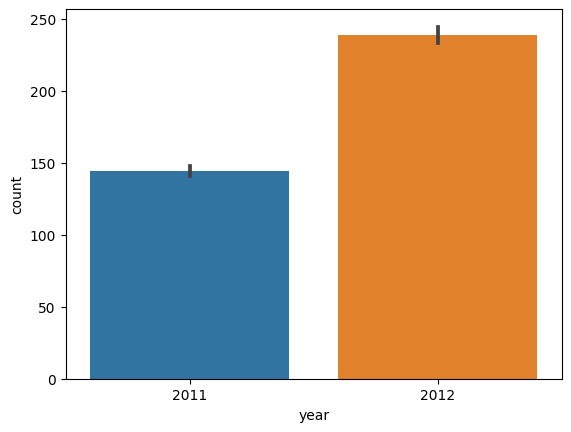

In [17]:
# 년도별로 count의 평균을 나타내 보았다.
sns.barplot(x = "year", y = "count", data = df)

<Axes: xlabel='month', ylabel='count'>

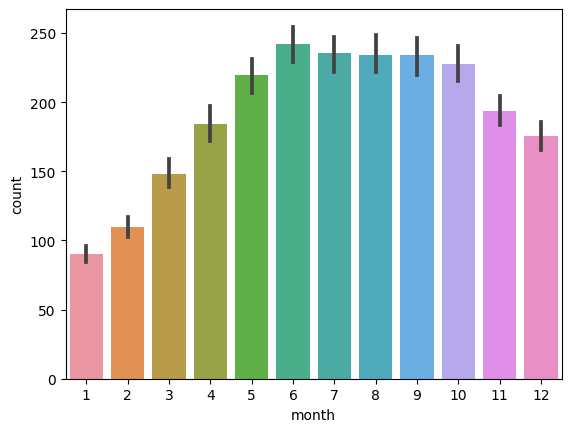

In [18]:
# 월별로도 내본다.
sns.barplot(x = "month", y = "count", data = df)

In [19]:
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1


<Axes: xlabel='year'>

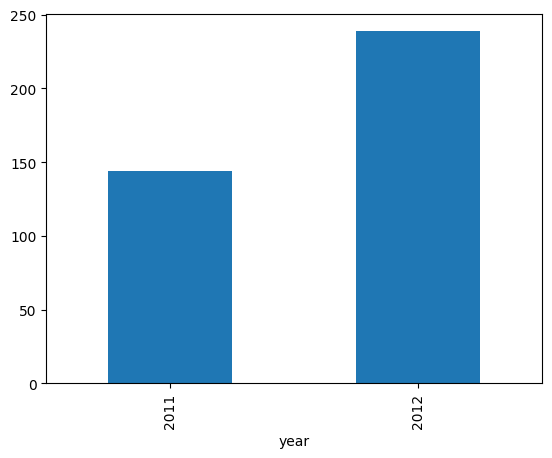

In [20]:
df.groupby("year")['count'].mean().plot.bar()

In [21]:
## agg 사용하기
df.groupby("season")[["temp","humidity", "count"]].agg(tme_mean = ("temp",np.mean), hum_sum = ("humidity",np.sum),count_min = ("count","count"))

,tme_mean,hum_sum,count_min
season,,,
1,12.530491,151216,2686
2,22.823483,166311,2733
3,28.789111,175250,2733
4,16.649239,180919,2734


<Axes: xlabel='season'>

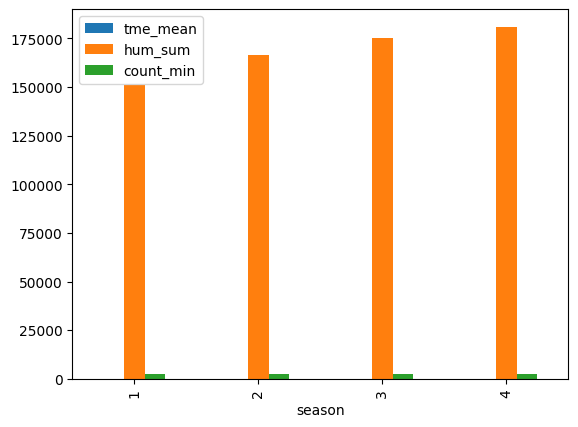

In [22]:
## agg 사용하기+그래프 그리기
df.groupby("season")[["temp","humidity", "count"]].agg(tme_mean = ("temp",np.mean), hum_sum = ("humidity",np.sum),count_min = ("count","count")).plot.bar()

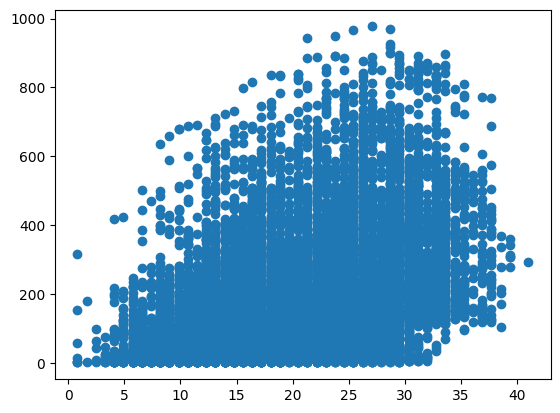

In [23]:
# 수치형 변수(temp)와 count의 관계를 본다. >> 큰 선형 관계가 있어 보이지 않지만 산점도가 작은 양의 상관관계를 나타내는 듯 하다.
plt.scatter(df["temp"].values, df["count"].values)

C:\Users\qotnd\AppData\Local\Temp\ipykernel_28648\1827603016.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


<Axes: >

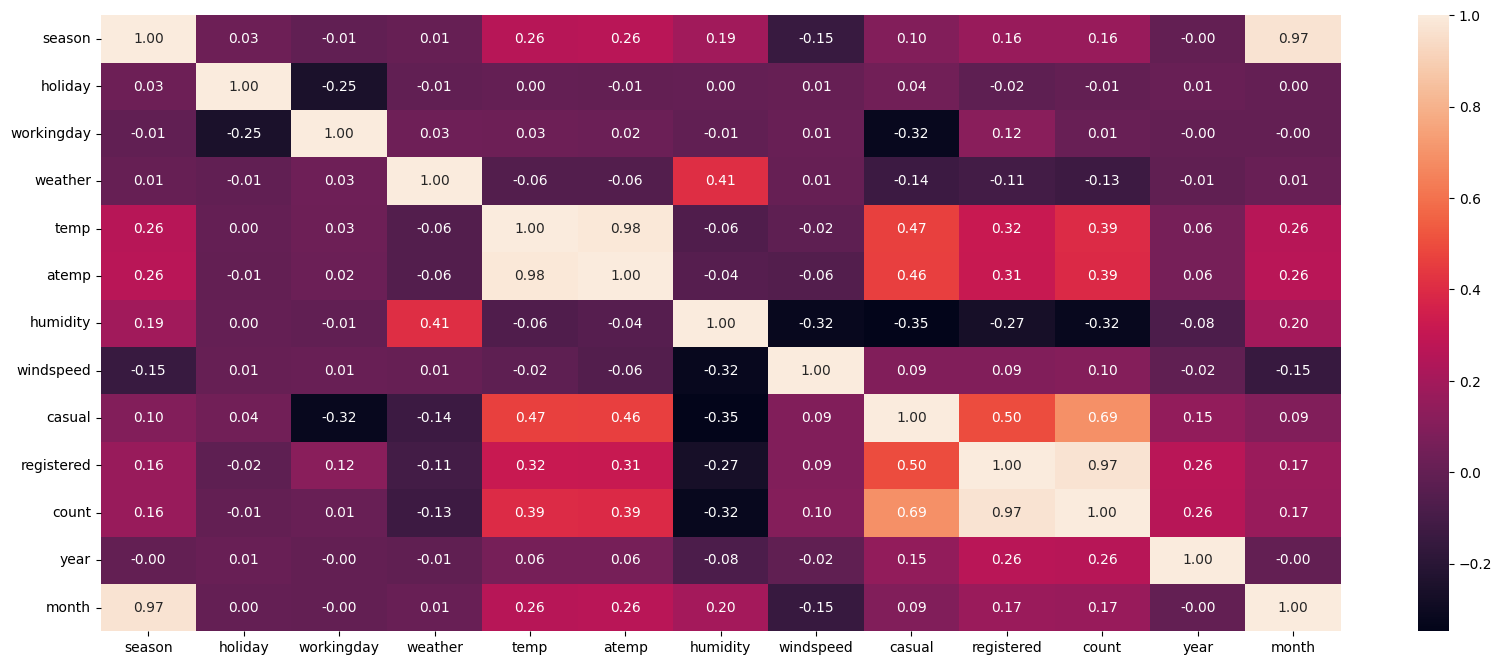

In [24]:
# 산점도 확인
plt.figure(figsize = (20,8))
sns.heatmap(df.corr(),
            annot = True, fmt = ".2f")

temp와 atmep의 상관관계가 0.98로 매우 크다. 이 중 하나의 변수를 제거하며, month와 season의 상관계수도 매우 크다. 따라서 새로만든 month변수를 삭제하며 atemp변수를 삭제한다.(이유는 없다.)

In [25]:
# 날짜변수, atemp, month 삭제해준다.
def pre(df):
    # 필요 없는 변수 버리기
    delete_cat = ["datetime", "atemp", "month"]
    df.drop(delete_cat, axis =1, inplace = True)

    # 종속 변수 로그변환
    df["count_log"] = np.log(df["count"])

    return df

In [26]:
df_new = pre(df)

In [27]:
df_new

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,year,count_log
0,1,0,0,1,9.84,81,0.0000,3,13,16,2011,2.772589
1,1,0,0,1,9.02,80,0.0000,8,32,40,2011,3.688879
2,1,0,0,1,9.02,80,0.0000,5,27,32,2011,3.465736
3,1,0,0,1,9.84,75,0.0000,3,10,13,2011,2.564949
4,1,0,0,1,9.84,75,0.0000,0,1,1,2011,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,50,26.0027,7,329,336,2012,5.817111
10882,4,0,1,1,14.76,57,15.0013,10,231,241,2012,5.484797
10883,4,0,1,1,13.94,61,15.0013,4,164,168,2012,5.123964
10884,4,0,1,1,13.94,61,6.0032,12,117,129,2012,4.859812


### 전처리

In [28]:
# 회귀 예측할 때 종속변수도 스케일링을 해야하는가?
# Standard Scaling을 진행한다.


int_var = ["temp","humidity","windspeed","casual","registered"]

from sklearn.preprocessing import StandardScaler
std = StandardScaler()

std.fit(df_new[int_var])
df_new[int_var] =std.transform(df_new[int_var])

In [29]:
df_new

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,year,count_log
0,1,0,0,1,-1.333661,0.993213,-1.567754,-0.660992,-0.943854,16,2011,2.772589
1,1,0,0,1,-1.438907,0.941249,-1.567754,-0.560908,-0.818052,40,2011,3.688879
2,1,0,0,1,-1.438907,0.941249,-1.567754,-0.620958,-0.851158,32,2011,3.465736
3,1,0,0,1,-1.333661,0.681430,-1.567754,-0.660992,-0.963717,13,2011,2.564949
4,1,0,0,1,-1.333661,0.681430,-1.567754,-0.721042,-1.023307,1,2011,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,-0.596935,-0.617666,1.617227,-0.580925,1.148417,336,2012,5.817111
10882,4,0,1,1,-0.702182,-0.253919,0.269704,-0.520875,0.499548,241,2012,5.484797
10883,4,0,1,1,-0.807428,-0.046064,0.269704,-0.640975,0.055934,168,2012,5.123964
10884,4,0,1,1,-0.807428,-0.046064,-0.832442,-0.480841,-0.255258,129,2012,4.859812


범주형 변수들의 경우 순서형이 아니므로 one-hot encoding을 해주는 게 좋다

In [42]:
# 원-핫 인코딩
cat_var = ["season", "holiday", "workingday", "weather", "year"]

df_new_dummy = pd.get_dummies(df_new, columns = cat_var)

### train_test_split

In [44]:
from sklearn.model_selection import train_test_split

In [46]:
X = df_new_dummy.drop(["count","count_log"], axis = 1)
y = df_new_dummy["count_log"]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [49]:
X_train

,temp,humidity,windspeed,casual,registered,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_1,weather_2,weather_3,weather_4,year_2011,year_2012
4875,-0.175949,1.668743,-0.710164,-0.721042,-0.943854,0,0,0,1,1,0,0,1,0,0,1,0,1,0
3907,0.876516,0.629466,0.024326,-0.100523,0.565759,0,0,1,0,1,0,0,1,1,0,0,0,1,0
7518,0.981763,-1.968726,0.024326,4.663461,1.095448,0,1,0,0,1,0,1,0,1,0,0,0,0,1
6718,-0.386442,1.668743,-0.832442,-0.620958,-1.010065,1,0,0,0,1,0,1,0,0,1,0,0,0,1
6616,0.350284,-0.305883,0.269704,-0.520875,-0.679009,1,0,0,0,1,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10001,-0.912675,0.213755,-0.220230,-0.660992,-0.983580,0,0,0,1,1,0,0,1,1,0,0,0,0,1
1446,-1.228414,-0.098028,-0.465608,-0.721042,-1.003444,0,1,0,0,1,0,0,1,1,0,0,0,1,0
9669,-0.281196,-0.409811,0.024326,-0.640975,-0.904127,0,0,0,1,1,0,1,0,0,1,0,0,0,1
3273,0.981763,1.097141,-0.220230,-0.440808,-0.705494,0,0,1,0,1,0,1,0,1,0,0,0,1,0


In [50]:
y_train

4875     2.564949
3907     5.605802
7518     6.380123
6718     2.079442
6616     4.143135
           ...   
10001    2.302585
1446     1.386294
9669     3.135494
3273     4.143135
7321     5.293305
Name: count_log, Length: 8164, dtype: float64

### Modeling

knn, 선형회귀, GradientBoosting, neural network등을 사용한다.

- 평가 지표 : https://velog.io/@dlskawns/Linear-Regression-%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EC%9D%98-%ED%8F%89%EA%B0%80-%EC%A7%80%ED%91%9C-MAE-MSE-RMSE-R-Squared-%EC%A0%95%EB%A6%AC

In [51]:
from sklearn.neighbors import KNeighborsRegressor

In [53]:
# knn regression

# 메소드 정의
knn = KNeighborsRegressor()

# 학습
knn.fit(X_train, y_train)

# 예측
pred_knn = knn.predict(X_test)

In [65]:
# 평가지표 mae, mse, rmse, r2
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, pred_knn)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred_knn)

In [66]:
print("knn의 rmse : {:.3f}\nknn의 r2 : {:.3f}".format(rmse, r2))

knn의 rmse : 0.624
knn의 r2 : 0.827


In [69]:
# 평가지표를 함수로 만들어버린다!
def reg_met(model_name, y_test, pred):
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred)

    print("{0}의 rmse : {1:.3f}\n{0}의 r2 : {2:.3f}".format(model_name, rmse, r2))
    


In [70]:
reg_met("KNN", y_test, pred_knn)

KNN의 rmse : 0.624
KNN의 r2 : 0.827


In [72]:
# GBM 모델
from sklearn.ensemble import GradientBoostingRegressor

# 모델 정의
gbm = GradientBoostingRegressor()

# 학습하기 >> gbm.score의 경우 어떤 평가지표인가?
gbm.fit(X_train, y_train)
print("GBM 모델 학습 성능 : {}".format(gbm.score(X_train, y_train)))

GBM 모델 학습 성능 : 0.9996378400917725


In [73]:
# 예측하기
pred_gbm = gbm.predict(X_test)

In [74]:
reg_met("GBM", y_test, pred_gbm)

GBM의 rmse : 0.032
GBM의 r2 : 1.000


rmse값의 경우 0에 가까울 정도로 매우 성능이 좋은것을 확인할 수 있다.

In [78]:
# neural network
from keras import models, layers

In [90]:
# layer 정의
model = models.Sequential()
model.add(layers.Dense(64, activation = "relu", input_shape = (X_train.shape[1],)))
model.add(layers.Dense(32, activation = "relu"))
model.add(layers.Dense(1))

In [91]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                1280      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,393
Trainable params: 3,393
Non-trainable params: 0
_________________________________________________________________


In [92]:
model.compile(optimizer = "rmsprop", loss = "mse", metrics = ["mse"])

In [93]:
history = model.fit(X_train, y_train, epochs = 5, batch_size = 1)

Epoch 1/5
8164/8164 [==============================] - 5s 606us/step - loss: 0.3395 - mse: 0.3395
Epoch 2/5
8164/8164 [==============================] - 5s 616us/step - loss: 0.1096 - mse: 0.1096
Epoch 3/5
8164/8164 [==============================] - 5s 642us/step - loss: 0.0827 - mse: 0.0827
Epoch 4/5
8164/8164 [==============================] - 5s 630us/step - loss: 0.0728 - mse: 0.0728
Epoch 5/5
8164/8164 [==============================] - 5s 632us/step - loss: 0.0616 - mse: 0.0616


In [95]:
pred_dnn = model.predict(X_test)

86/86 [==============================] - 0s 692us/step


In [96]:
reg_met("dnn",y_test, pred_dnn)

dnn의 rmse : 0.267
dnn의 r2 : 0.968


GBM의 성능이 가장 좋았음을 알 수 있다.